In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv('/content/taxi_trip_pricing.csv')
df


,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [7]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


<Axes: xlabel='Trip_Price', ylabel='Density'>

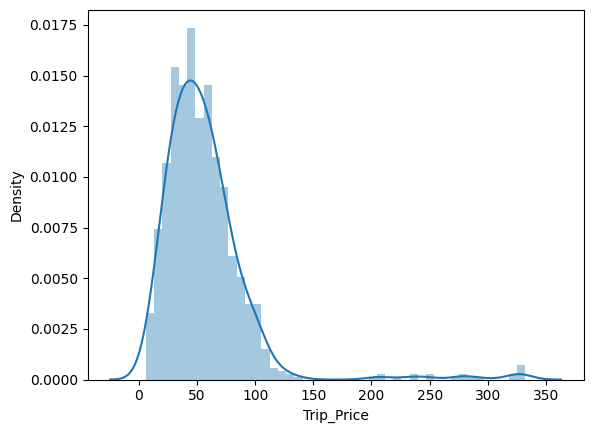

In [8]:
sns.distplot(df['Trip_Price'])

<Axes: xlabel='Trip_Distance_km', ylabel='Density'>

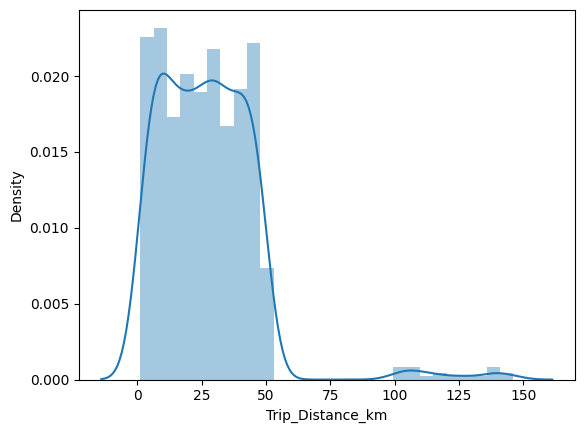

In [9]:
sns.distplot(df['Trip_Distance_km'])

# **Scatter Plot**

<Axes: xlabel='Trip_Distance_km', ylabel='Trip_Price'>

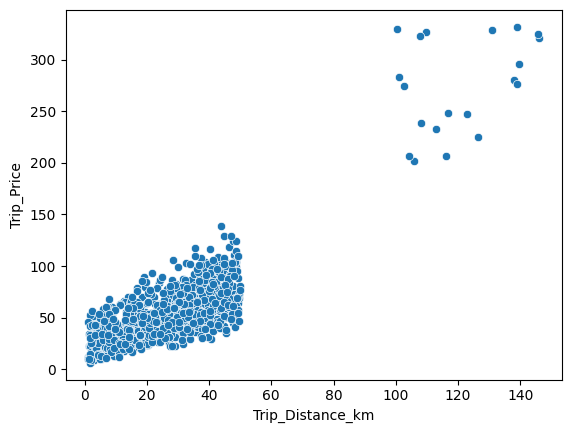

In [10]:
sns.scatterplot(x='Trip_Distance_km',y='Trip_Price',data=df)

# **Missing Value**

In [11]:
# @title Default title text
columns_to_check = ['Trip_Price', 'Trip_Distance_km']
missing_counts = df[columns_to_check].isnull().sum()
print(missing_counts)

Trip_Price          49
Trip_Distance_km    50
dtype: int64


In [12]:
imputer = SimpleImputer(strategy='median')  # use mean, median or or any repeated value
df[['Trip_Distance_km', 'Trip_Price']] = imputer.fit_transform(df[['Trip_Distance_km', 'Trip_Price']])

# **Outliar**

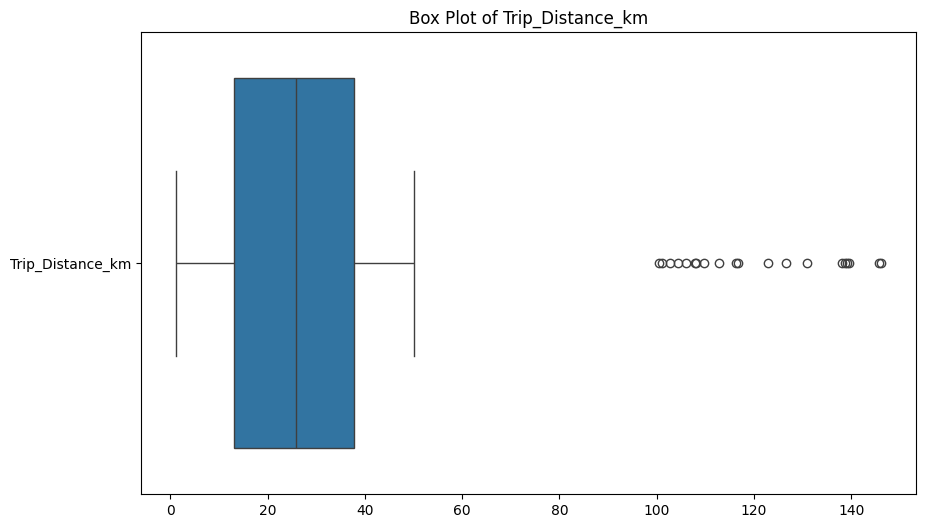

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Trip_Distance_km']] , orient='h')
plt.title('Box Plot of Trip_Distance_km')
plt.show()

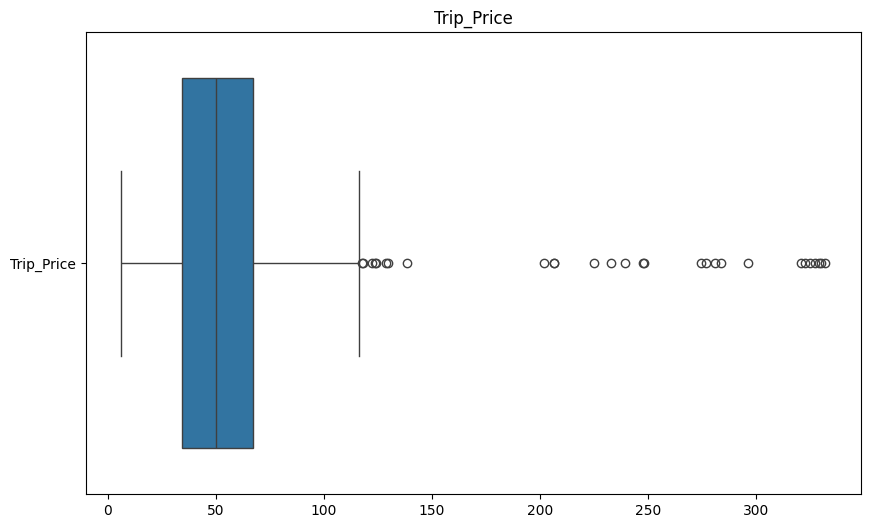

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Trip_Price']] , orient='h')
plt.title('Trip_Price')
plt.show()

In [16]:
for column in ['Trip_Distance_km', 'Trip_Price']:
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# **After Removing Outliar**

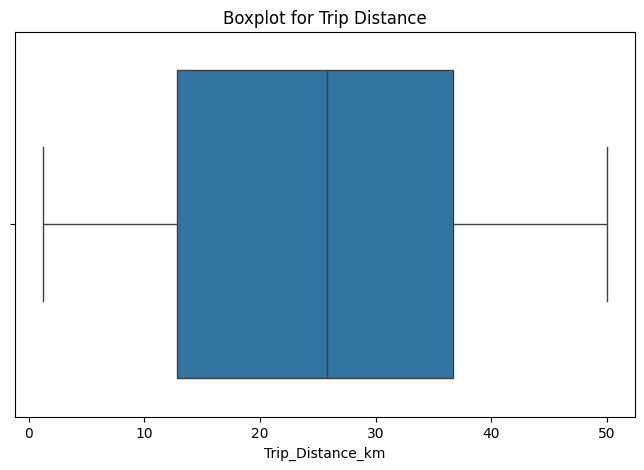

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Trip_Distance_km'])
plt.title('Boxplot for Trip Distance')
plt.show()

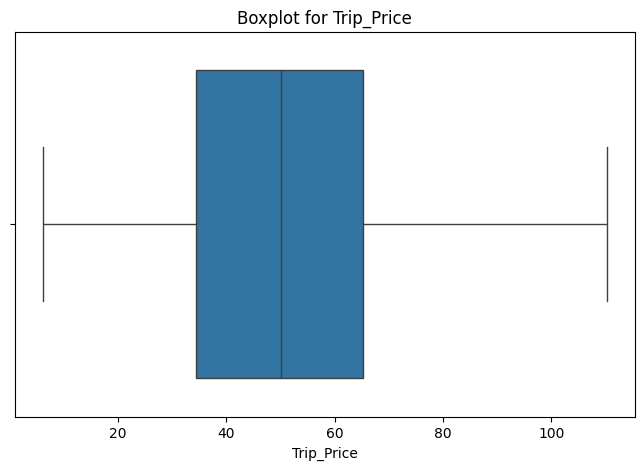

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Trip_Price'])
plt.title('Boxplot for Trip_Price')
plt.show()

# **Correlation**

In [ ]:
correlation = df['Trip_Distance_km'].corr(df['Trip_Price'])
print("Correlation Matrix:", correlation)

Correlation Matrix: 0.8304791543522826


***Check Missing data Before Process***

In [ ]:
columns_to_check = ['Trip_Price', 'Trip_Distance_km']
missing_counts = df[columns_to_check].isnull().sum()
print(missing_counts)

Trip_Price          0
Trip_Distance_km    0
dtype: int64


In [19]:
scaler = StandardScaler()
df['Trip_Distance_km'] = scaler.fit_transform(df[['Trip_Distance_km']])
df['Trip_Price'] = scaler.fit_transform(df[['Trip_Price']])

In [20]:
X = df[['Trip_Distance_km']]
y = df['Trip_Price']

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test)

In [24]:
mse = mean_squared_error(y_test,y_pred)
mse

0.5934701518959352

In [25]:
np.sqrt(mse)

0.7703701395406855

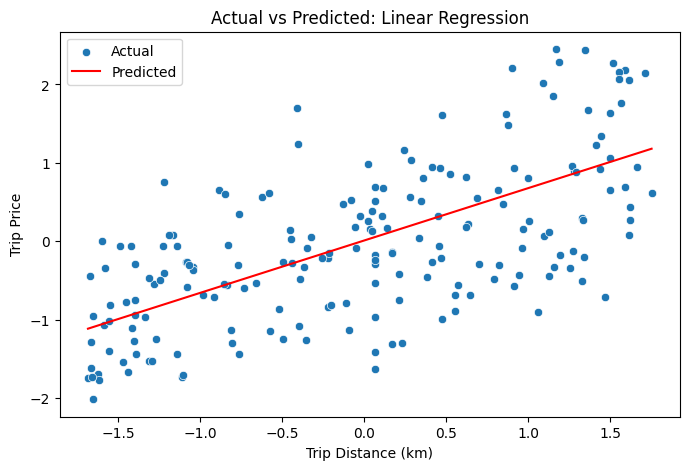

In [26]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test['Trip_Distance_km'], y=y_test, label="Actual")
sns.lineplot(x=X_test['Trip_Distance_km'], y=y_pred, color="red", label="Predicted")
plt.xlabel("Trip Distance (km)")
plt.ylabel("Trip Price")
plt.title("Actual vs Predicted: Linear Regression")
plt.legend()
plt.show()

In [27]:
print(f"\nModel Coefficients:")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient: {model.coef_[0]:.2f}")


Model Coefficients:
Intercept: 0.01
Coefficient: 0.67
